# Customer Segmentation (RFM Analysis)

This project segments customers based on Recency, Frequency, and Monetary value to identify high-value customers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')

print("orders:", orders.shape)
print("order_items:", order_items.shape)

orders.head()

orders: (99441, 8)
order_items: (112650, 7)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##  Data Preparation

In [2]:
# Convert to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Merge datasets
sales_data = orders.merge(order_items, on='order_id')

sales_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


##  Recency (R)

In [3]:
# Snapshot date (latest date in dataset)
snapshot_date = sales_data['order_purchase_timestamp'].max()

# Recency calculation
recency = sales_data.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()

recency['recency'] = (snapshot_date - recency['order_purchase_timestamp']).dt.days

recency.head()

,customer_id,order_purchase_timestamp,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,292
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,413
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,551
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,382
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,153


## Frequency (F)

In [4]:
# Frequency = number of orders per customer
frequency = sales_data.groupby('customer_id')['order_id'].nunique().reset_index()

frequency.columns = ['customer_id', 'frequency']

frequency.head()

,customer_id,frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


## Monetary (M)

In [5]:
# Monetary = total spend per customer
monetary = sales_data.groupby('customer_id')['price'].sum().reset_index()

monetary.columns = ['customer_id', 'monetary']

monetary.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


##  Build RFM Table

In [6]:
# Merge Recency, Frequency, Monetary into one table
rfm = recency[['customer_id', 'recency']].merge(frequency, on='customer_id').merge(monetary, on='customer_id')

rfm.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00


## RFM Scoring

In [7]:
# Recency score (lower recency = better → higher score)
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])

# Frequency score (higher frequency = better)
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4])

# Monetary score (higher spending = better)
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4])

rfm.head()

,customer_id,recency,frequency,monetary,R_score,F_score,M_score
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,3
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3


##  Customer Segmentation

In [8]:
# Combine scores into one
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Create segments
def segment(row):
    if row['RFM_score'] == '444':
        return 'Best Customers'
    elif int(row['F_score']) >= 3:
        return 'Loyal Customers'
    else:
        return 'Others'

rfm['segment'] = rfm.apply(segment, axis=1)

rfm.head()

,customer_id,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,segment
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213,Others
1,000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112,Others
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114,Others
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,3,113,Others
4,000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313,Others


## Customer Segments Distribution

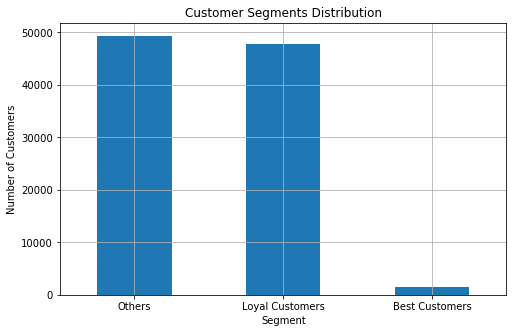

In [9]:
# Count of each segment
segment_counts = rfm['segment'].value_counts()

# Plot
plt.figure(figsize=(8,5))
segment_counts.plot(kind='bar')
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid()
plt.show()

##  Key Insights

- A small group of "Best Customers" contributes significantly to revenue.
- "Loyal Customers" purchase frequently and are important for stable revenue.
- A large portion of customers fall into the "Others" category, indicating opportunity for growth.

##  Business Recommendations

- Focus on retaining "Best Customers" through exclusive offers and rewards.
- Engage "Loyal Customers" with personalized promotions to increase spending.
- Target "Others" with marketing campaigns to convert them into repeat buyers.